# Evaluation insights for the BtEurope network

This notebook is copied and adjusted from the Abilene notebook.

**Inputs:**
* Algorithms: bjointsp, greedy, random
* Network: BtEurope
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

BtEurope is a medium-size network with 24 nodes and 37 edges. In comparison to the Airtel network, it is much denser, i.e., has shorter link delays.

![BtEurope](http://topology-zoo.org/maps/BtEurope.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('BtEurope', 'bjointsp')
greedy_chain_df, greedy_aux_chain_df, greedy_vnf_df, greedy_aux_vnf_df = eval.prepare_eval('BtEurope', 'greedy')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('BtEurope', 'random')

In [2]:
# combined dfs for easier eval
aux_vnf_df = pd.concat([bjointsp_aux_vnf_df, greedy_aux_vnf_df, random_aux_vnf_df])
vnf_df = pd.concat([bjointsp_vnf_df, greedy_vnf_df, random_vnf_df])
chain_df = pd.concat([bjointsp_chain_df, greedy_chain_df, random_chain_df])

There are 12 different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [3]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,4.0,5.0,1.0,1.25
1,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,2.0,3.0,1.0,1.50
2,BtEurope,24,37,fw1chain,3,source2,1,bjointsp,2.0,3.0,1.0,1.50
3,BtEurope,24,37,fw1chain,3,source3,1,bjointsp,4.0,5.0,1.0,1.25
4,BtEurope,24,37,fw1chain,3,source4,1,bjointsp,2.0,3.0,1.0,1.50


In [4]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,BtEurope,24,37,fw1chain,3,source0,1,4.0,sim
1,bjointsp,BtEurope,24,37,fw1chain,3,source1,1,2.0,sim
2,bjointsp,BtEurope,24,37,fw1chain,3,source2,1,2.0,sim
3,bjointsp,BtEurope,24,37,fw1chain,3,source3,1,4.0,sim
4,bjointsp,BtEurope,24,37,fw1chain,3,source4,1,2.0,sim


In [5]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,vnf_user,vnf_fw1,4.0,4.218,0.218,1.054500
1,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,0.0,0.101,0.101,inf
2,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,vnf_user,vnf_fw1,2.0,2.209,0.209,1.104500
3,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,0.0,0.100,0.100,inf
4,BtEurope,24,37,fw1chain,3,source2,1,bjointsp,vnf_user,vnf_fw1,2.0,2.194,0.194,1.097000


## Inter-VNF RTT

Text(0.5,1,'Inter-VNF RTT')

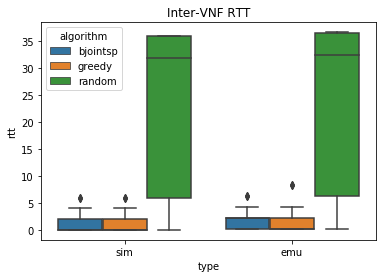

In [6]:
sns.boxplot(x='type', y='rtt', hue='algorithm', data=aux_vnf_df).set_title('Inter-VNF RTT')

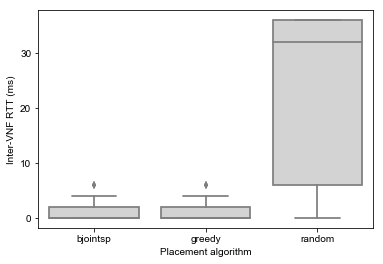

In [7]:
# tuned figure for paper: focus on sim_rtt (emu_rtt similar and checked later)
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
sns.boxplot(x='algorithm', y='sim_rtt', data=vnf_df, color='lightgrey', ax=ax)
#ax.set_title('Sim. inter-VNF RTT')
ax.set_xlabel('Placement algorithm')
ax.set_ylabel('Inter-VNF RTT (ms)')
ax.set_facecolor('white')
fig.savefig('plots/bteurope_sim_vnf_rtt.pdf', bbox_inches='tight')

The larger the network, the worse random placement becomes.

### Inter-VNF RTT difference

Absolute difference between emulated and simulated inter-VNF RTT: emu_rtt - sim_rtt

Text(0.5,1,'Inter-VNF RTT difference')

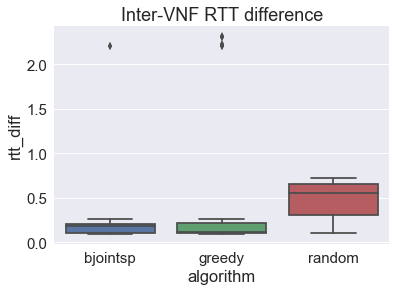

In [10]:
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df).set_title('Inter-VNF RTT difference')
# why are there outliers?

In [30]:
# check outliers
vnf_df.loc[vnf_df['rtt_diff'] > 1]

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
49,BtEurope,24,37,fw2chain,4,source9,1,bjointsp,vnf_fw1,vnf_web,0.0,2.200,2.200,NaN
88,BtEurope,24,37,fw3chain,5,source9,1,bjointsp,vnf_fw2,vnf_fw1,0.0,2.200,2.200,NaN
19,BtEurope,24,37,fw1chain,3,source9,1,greedy,vnf_fw1,vnf_web,6.0,8.304,2.304,1.384000
48,BtEurope,24,37,fw2chain,4,source9,1,greedy,vnf_fw2,vnf_fw1,6.0,8.305,2.305,1.384167
49,BtEurope,24,37,fw2chain,4,source9,1,greedy,vnf_fw1,vnf_web,0.0,2.218,2.218,NaN
69,BtEurope,24,37,fw3chain,5,source4,1,greedy,vnf_fw1,vnf_web,0.0,2.205,2.205,NaN
73,BtEurope,24,37,fw3chain,5,source5,1,greedy,vnf_fw1,vnf_web,2.0,4.227,2.227,2.113500
79,BtEurope,24,37,fw3chain,5,source7,1,greedy,vnf_fw3,vnf_fw2,0.0,2.211,2.211,NaN
87,BtEurope,24,37,fw3chain,5,source9,1,greedy,vnf_fw3,vnf_fw2,6.0,8.313,2.313,1.385500
88,BtEurope,24,37,fw3chain,5,source9,1,greedy,vnf_fw2,vnf_fw1,0.0,2.200,2.200,NaN


Wenn man sich das erste ansieht: 0 sim_rtt, aber 2.2 emu_rtt. Es geht um den Link zwischen pop16 und pop17 mit delay 0.509.., wo emu zu 1 ms gerundet hat und simulation offenbar zu 0 ms. Warum wird unterschiedlich gerundet?! TODO: checken und am besten wirklich die gleiche funktion benutzen für sim und emu (auch bjointsp)

als andere stichprobe: greedy, fw3chain mit source4. inter-VNF RTT zwischen vnf_fw1 (pop16) und vnf_web (pop17). es ist wahrscheinlich immer der gleiche link, der probleme macht

Python 2 (emu) und Python 3 (placement) runden unterschiedlich! Aber ist das wirklich das Problem? Beide sollten 0.50934691642 zu 1 runden. Das liese sich durch np.around() lösen. Wird der ursprüngliche Delay oder die Distanz schon anders berechnet?
Ja, wird anders berechnet! Sim berechnet eine Distanz von 0.0m, weil es gleiche GPS koordinaten für pop16 und 17 hat!

Ich verstehe nicht, was emu macht. Es scheint gar keinen Link zwischen 16 und 17 zu haben. im Log findet man außerdem öfter `RuntimeError: concurrent poll() invocation`

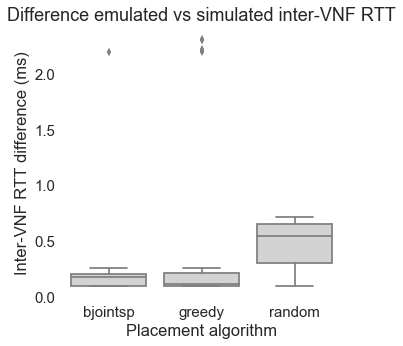

In [11]:
# tuned figure for paper
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.5)
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax, color='lightgrey')
ax.set_title('Difference emulated vs simulated inter-VNF RTT')
ax.set_xlabel('Placement algorithm')
ax.set_ylabel('Inter-VNF RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/bteurope_vnf_rtt_diff.pdf', bbox_inches='tight')

The absolute difference between simulated and emulated inter-VNF RTTs is rather small. 

For bjointsp and greedy, it is generally smaller than for random placement. Also the spread is smaller. This is probably due to the longer paths in random placement, which allow for more deviation between simulation and emulation.

**TODO:** Check outliers!

Text(0.5,1,'Random inter-VNF RTT difference')

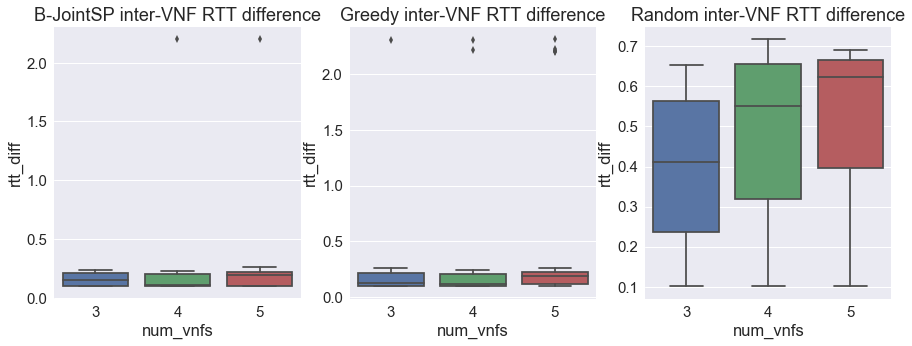

In [12]:
# plot RTT difference for different chain lengths
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random inter-VNF RTT difference')

As expected, the chain length does not affect the inter-VNF RTT.

Text(0.5,1,'Random placement')

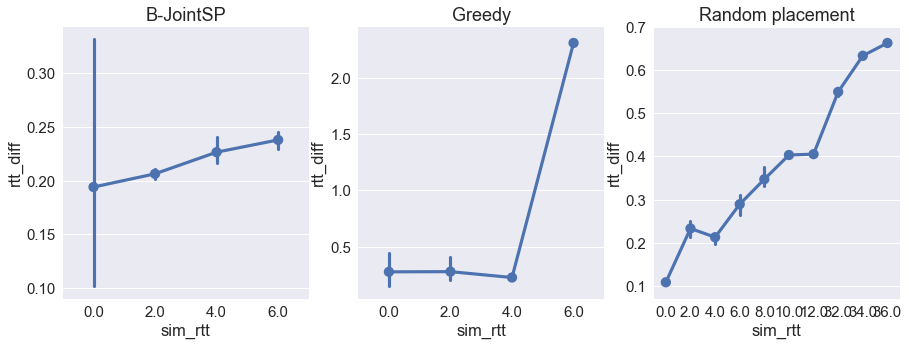

In [13]:
# plot RTT difference as a variable of the node distance = link delay = sim delay/RTT
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.pointplot(x='sim_rtt', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random placement')

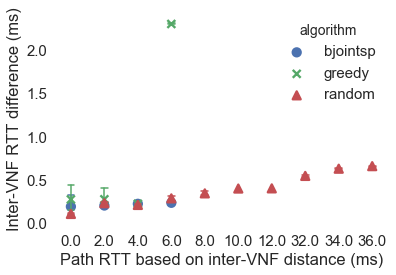

In [14]:
# tuned figure for paper
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
#black_palette = sns.color_palette(['black', 'black', 'black'])
sns.pointplot(x='sim_rtt', y='rtt_diff', data=vnf_df, ax=ax,
              hue='algorithm', join=False, markers=['o', 'x', '^'], errwidth=1.5, capsize=0.2)
#ax.set_title('Difference emulated vs simulated inter-VNF RTT')
ax.set_xlabel('Path RTT based on inter-VNF distance (ms)')
ax.set_ylabel('Inter-VNF RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/bteurope_vnf_rtt_diff_sim_rtt.pdf', bbox_inches='tight')

The difference of emulated and simulated inter-VNF RTTs increases with increasing simulated inter-VNF RTT. The simulated inter-VNF RTT directly reflects the link delay and thus distance between two connected VNFs.

Hence, for two very close VNFs, the simulated and emulated delays are almost identical, but for VNFs that are placed farther away (higher sim_rtt), the emulated delay can be significantly larger than the simulated delay.


### Inter-VNF RTT ratio

Relative ratio of emulated vs. simulated inter-VNF RTT: emu_rtt / sim_rtt

Set to infinity if sim_rtt = 0.

In [19]:
# set infinite ratios to NaN, so they are ignored when plotting
print('Entries with inifinite ratio: {}'.format(vnf_df['rtt_ratio'].loc[vnf_df['rtt_ratio'] == np.inf].count()))
vnf_df = vnf_df.replace(np.inf, np.nan)

vnf_df.loc[vnf_df['rtt_ratio'].isnull()]

Entries with inifinite ratio: 0


,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
1,BtEurope,24,37,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,0.0,0.101,0.101,NaN
3,BtEurope,24,37,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,0.0,0.100,0.100,NaN
5,BtEurope,24,37,fw1chain,3,source2,1,bjointsp,vnf_fw1,vnf_web,0.0,0.099,0.099,NaN
7,BtEurope,24,37,fw1chain,3,source3,1,bjointsp,vnf_fw1,vnf_web,0.0,0.101,0.101,NaN
8,BtEurope,24,37,fw1chain,3,source4,1,bjointsp,vnf_user,vnf_fw1,0.0,0.104,0.104,NaN
10,BtEurope,24,37,fw1chain,3,source5,1,bjointsp,vnf_user,vnf_fw1,0.0,0.097,0.097,NaN
11,BtEurope,24,37,fw1chain,3,source5,1,bjointsp,vnf_fw1,vnf_web,0.0,0.099,0.099,NaN
13,BtEurope,24,37,fw1chain,3,source6,1,bjointsp,vnf_fw1,vnf_web,0.0,0.102,0.102,NaN
15,BtEurope,24,37,fw1chain,3,source7,1,bjointsp,vnf_fw1,vnf_web,0.0,0.102,0.102,NaN
17,BtEurope,24,37,fw1chain,3,source8,1,bjointsp,vnf_fw1,vnf_web,0.0,0.103,0.103,NaN


We now have results with 0 simulated delay because the VNFs are so close that the link delay is rounded to 0 ms. This will lead to a high difference with the emulated delay.

Text(0.5,1,'Inter-VNF RTT ratio')

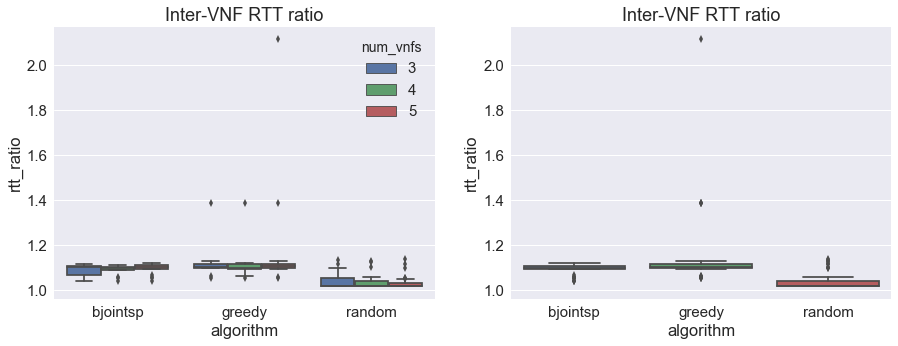

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='algorithm', y='rtt_ratio', hue='num_vnfs', data=vnf_df, ax=ax1).set_title('Inter-VNF RTT ratio')
# splitting the plot up for different chain lengths doesn't help so much
sns.boxplot(x='algorithm', y='rtt_ratio', data=vnf_df, ax=ax2).set_title('Inter-VNF RTT ratio')

Here, the outliers increase the ratio for bjointsp and greedy.

## Chain RTT

Let's continue the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

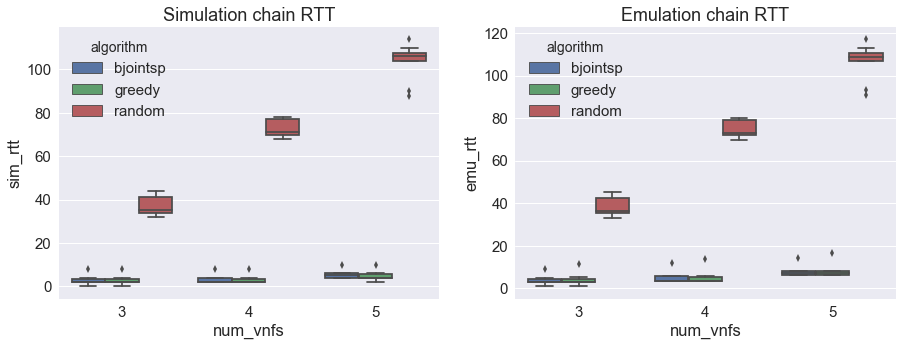

In [22]:
# comparison of bjointsp and random placement
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

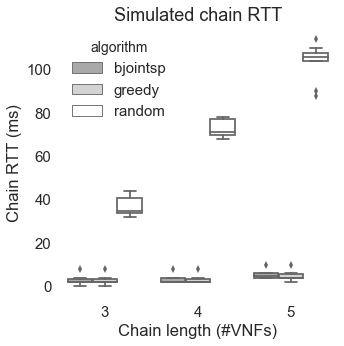

In [23]:
# tuned figure for paper
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.5)
grayscale = sns.color_palette(['darkgray', 'lightgray', 'white'])
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax, palette=grayscale)
ax.set_title('Simulated chain RTT')
ax.set_xlabel('Chain length (#VNFs)')
ax.set_ylabel('Chain RTT (ms)')
ax.set_facecolor('white')
fig.savefig('plots/bteurope_chain_rtt.pdf', bbox_inches='tight')

Clearly, random placement leads to much higher simulation and emulation delays than bjointsp. Greedy leads to quite similar (or slightly higher delays). For all algorithms, the delays increase notably with increasing chain length (num_vnfs).

Compared to the large Airtel network, the difference between bjointsp and random placement is not as big in the small Abilene network.

Text(0.5,1,'Random chain RTT')

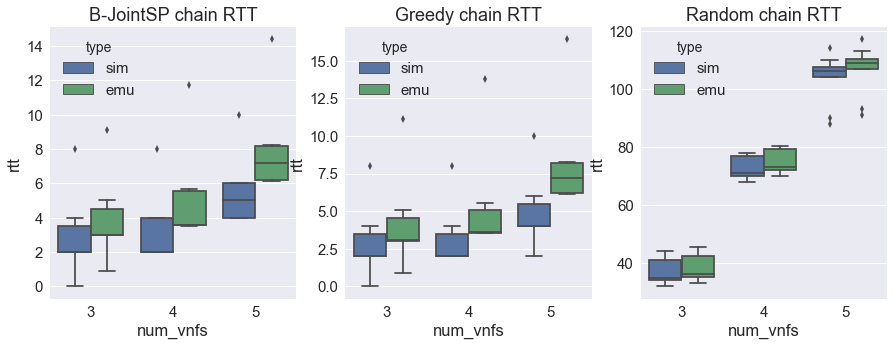

In [24]:
# comparison of simulation and emulation delays
# this is what aux_chain_df is for
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=bjointsp_aux_chain_df, ax=ax1).set_title('B-JointSP chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=greedy_aux_chain_df, ax=ax2).set_title('Greedy chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=random_aux_chain_df, ax=ax3).set_title('Random chain RTT')

Compared to the Airtel network, the difference between simulation and emulation appears much larger in the Abilene network. In Abilene, link delays are shorter and VNF processing delays (not considered in simulation) have a larger relative impact.


### Chain RTT difference

Absolute difference between emulated and simulated chain RTT: emu_rtt - sim_rtt

Text(0.5,1,'Random chain RTT difference')

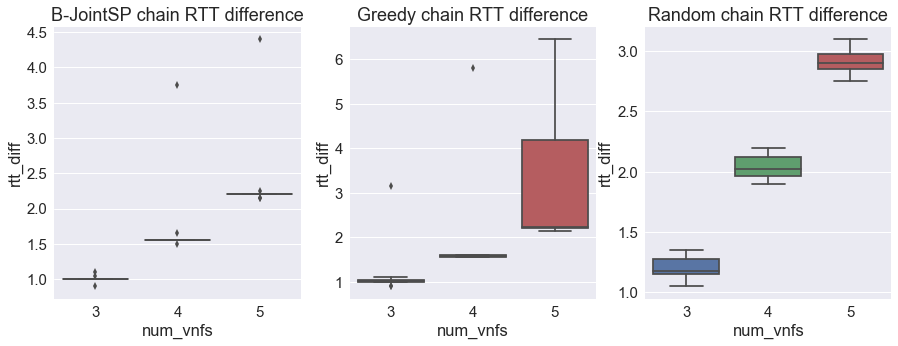

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_chain_df, ax=ax2).set_title('Greedy chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax3).set_title('Random chain RTT difference')

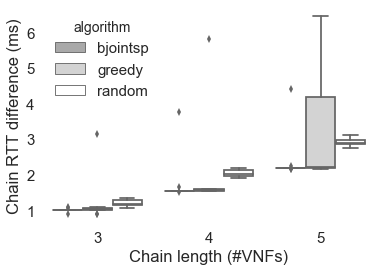

In [26]:
# tuned figure for paper
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
grayscale = sns.color_palette(['darkgray', 'lightgray', 'white'])
sns.boxplot(x='num_vnfs', y='rtt_diff', hue='algorithm', data=chain_df, ax=ax, palette=grayscale)
#ax.set_title('Difference emulated vs simulated chain RTT')
ax.set_xlabel('Chain length (#VNFs)')
ax.set_ylabel('Chain RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/airtel_chain_rtt_diff.pdf', bbox_inches='tight')

Looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation/spread in rtt_diff for each chain length, meaning that any difference can be well explained through chain length.

For random placement, the absolute difference between simulated and emulated chain RTTs is a little higher (longer paths).


### Chain RTT ratio

Relative ratio of emulated vs. simulated chain RTT: emu_rtt / sim_rtt

Text(0.5,1,'Chain RTT ratio')

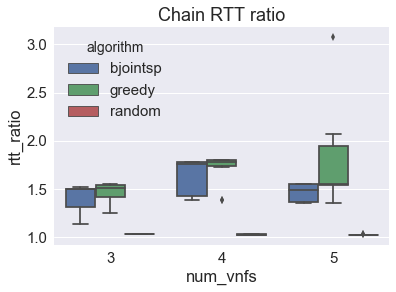

In [27]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', hue='algorithm', data=chain_df).set_title('Chain RTT ratio')

**B-JointSP**: While the absolute difference between emulated and simulated chain RTT clearly increases for increasing chain length, the relative ratio of the two stays fairly constant at slightly above 1.

**Greedy**: Similar to B-JointSP but rather smaller ratio. The slightly longer paths for 5 VNFs lead to larger sim_rtt and emu_rtt and a smaller ratio.

**Random**: While the absolute RTT difference is higher, random placement actually has a lower relative ratio RTT ratio compared to the other algorithms. Again, likely due to lower relative impact of VNF processing.

# Conclusion

* Still outliers in BtEurope. Can partly be explained by rounded delays to 0. In emulation, 0 delay just doesn't happen and usually leads to high difference.